In [45]:
#  Lucía Cantú-Miller  		     A01194199
#  Jesus Lozano  		 	     A01194162
#  Adrián Hinojosa  			 A00822490
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from LogisticRegressor import LogisticRegressor
#remove warning
import warnings
warnings.filterwarnings('ignore')

In [46]:
# Use the sigmoid function.
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


In [47]:
# Z function that will help print out every iteration's theta.
def z(input, Theta):
    # print('Theta is {} in transpose {}, input is {}'.format(Theta.shape, Theta.T.shape, input.shape))
    # we need to get an n x m array, where n is the neurons in this layer and m is the number of activations we used
    return Theta @ input

In [48]:
# Using an activation function which works by calling the sigmoid function.
def activation(z):
    return sigmoid(z)

In [49]:
# Initialize the weights to start our model. 
def initialize_weights(X, num_classes, hidden):
    weights = []
    out_neurons = num_classes # len(y)
    n = X.shape[0]
    
    h_layers = len(hidden)
    # print('Hidden layers will be {}'.format(h_layers))
    s_j = n
    # [2]
    for j in range(0,h_layers):
        s_jplus1 = hidden[j]
        cols = s_j + 1
        # print('Theta {} will be {}x{}'.format(j+1, s_jplus1, cols))
        # weights_layer = np.zeros((s_jplus1, cols))
        weights_layer = np.random.rand(s_jplus1, cols)
        weights.append(weights_layer)
        s_j = s_jplus1
    
    # weights.append(np.zeros((out_neurons, s_j + 1)))
    weights.append(np.random.rand(out_neurons, s_j + 1))
    return weights

In [50]:
# Initialize the activations for the output neurons.
def initialize_activations(X, output_neurons, hidden):
    # initialize activations, they are
    # input layer: (n+1) x 1, 
    # hidden: (each + 1) x 1
    # output: output_neurons x 1
    # So we can represent them with a list of length 2 + len(hidden)

    activations = []
    # input layer
    a_1 = np.array([X[:,0]]).T
    biases = np.ones(a_1.shape[1])
    a_1 = np.vstack((biases, a_1))
    activations.append(a_1)

    for i in range(len(hidden)):
        a_i = np.zeros((hidden[i] + 1 , 1))
        a_i[0,0] = 1.0
        activations.append(a_i)

    # output layer
    activations.append(np.zeros((output_neurons,1)))
    return activations

In [51]:
# Forward function in order to feed forward.
def forward(X, hidden, activations, weights):
    m = X.shape[1]
    for e in range(m):
        # a^0 = X
        # print('activations shape {} '.format(activations.shape))
        # print('initial activations {}'.format(activations))
        
        # FeedForward
        # Hidden layers
        for i in range(0, len(hidden)):
            a_i = activations[i]
            # print('In Layer {}'.format(i+1))
            z_next = z(a_i, theta[i])
            # print('z_i are {}'.format(z_next.T))
            a_next = activation(z_next)
            activations[i+1][1:] = a_next # this line would fail for output layer
            # print('activations {} are {}'.format(i+1, a_next))

        # output layer (i+2 is the output layer)
        a_i = activations[i+1]
        z_next = z(a_i, theta[i+1])
        a_next = activation(z_next)
        activations[i+2] = a_next
        # print('output is {}'.format(a_next.T))

In [52]:
# Function that uses the backpropagation algorithm, using the solution context.
def backprop(y, hidden, activations, theta, alpha, reg):
    m = len(y)
    delta = []
    # Calculating local gradients
    # Output layer
    y_pred = activations[-1]
    delta_i = y_pred - y
    # print('Error is {}'.format(delta_i.T))
    delta.append(delta_i)

    start = len(activations) - 1

    # Hidden layers
    for i in range(start, 1, -1): # we don't calculate errors for input layer
        # print('In layer {}'.format(i))
        theta_prev = theta[i-1][:,1:] # this is ignoring bias
        tmp = theta_prev.T @ delta_i
        # print('tmp is {}'.format(tmp.T))
        delta_i = tmp * ( activations[i-1][1:] * (1 - activations[i-1][1:])) # this is ignoring bias
        # print('Error is {}'.format(delta_i.T))
        delta.append(delta_i)
    
    # delta list holds the values
    # delta length is all but first layer (layers-1)
    # we could add an extra column for input layer to have the same
    # indexes as in the slides
    delta.reverse()
    # print(delta)

    # Calculating Deltas
    num_clases = theta[-1].shape[0]
    Delta = initialize_weights(X, num_clases, hidden) # The Delta has the same dimensions as the weight matrix (we will ignore bias though)
    # This is for weights, not for neurons, that is why we reach layer 1
    start = len(delta) - 1
    for i in range(start, -1, -1):
        # print('Now in layer {}'.format(i+1))
        activations_this_layer = activations[i][1:,:] # this is ignoring bias
        delta_next_layer = delta[i]
        activations_times_delta = activations_this_layer@delta_next_layer.T
        Delta[i][:,1:] = activations_times_delta.T 
    
    D = [ x/m for x in Delta]

    for i in range(len(D)):
        d = D[i]
        t = theta[i]
        d[:,1:] += reg * t[:,1:]
    
    for i in range(len(theta)):
        t = theta[i]
        d = D[i]

        t[:, 1:] = t[:, 1:] - (alpha * d[:, 1:])

    # print(theta)

In [53]:
def predict(X, theta):
    a_i = X
    # all theta layers
    for i in range(len(theta)):
        # print('In layer {}'.format(i+1))
        biases = np.ones(a_i.shape[1])
        a_i = np.vstack((biases, a_i))

        z_next = z(a_i, theta[i])
        a_i = activation(z_next)

    return a_i

In [54]:
def get_one_hot(targets, nb_classes):
    res = np.eye(nb_classes)[np.array(targets).reshape(-1)]
    return res.reshape(list(targets.shape)+[nb_classes])

In [55]:
from numpy import where
from numpy import meshgrid
from numpy import arange
from numpy import hstack
from matplotlib import pyplot
import numpy as np

def plot_decision_boundary(X, y, classifier):
    # for other color maps, see
    # https://matplotlib.org/stable/gallery/color/colormap_reference.html
    colormap = 'Greens'
    # unique classes:
    unique_classes = np.unique(y)
    # define bounds of the domain
    # min1, max1 = X[:, 0].min()-1, X[:, 0].max()+1
    # min2, max2 = X[:, 1].min()-1, X[:, 1].max()+1
    # again, this is because in 0 we have the bias
    min1, max1 = X[:, 1].min()-1, X[:, 1].max()+1
    min2, max2 = X[:, 2].min()-1, X[:, 2].max()+1
    # define the x and y scale
    x1grid = arange(min1, max1, 0.1)
    x2grid = arange(min2, max2, 0.1)
    # create all of the columns and rows of the grid
    xx, yy = meshgrid(x1grid, x2grid)
    # flatten each grid to a vector
    r1, r2 = xx.flatten(), yy.flatten()
    r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1)) # to obtain an Lx1 vector rather than (L,) vector
    # horizontal stack vectors to create x1,x2 input for the model
    grid = hstack((r1,r2))

    # TODO: Your classifier goes here
    # make predictions for the grid
    the_ones = np.ones((grid.shape[0],1))
    yhat = classifier.predict(np.column_stack((the_ones,grid)).T) 
    # reshape the predictions back into a grid
    zz = yhat.reshape(xx.shape)

    pyplot.figure()
    # plot the grid of x, y and z values as a surface
    pyplot.contourf(xx, yy, zz, cmap=colormap)

    # create scatter plot for samples from each class
    # for class_value in range(len(unique_classes)):
    for class_value in unique_classes:
        # get row indexes for samples with this class
        row_ix = where(y == class_value)[0] # need the first element of the tuple :S
        # create scatter of these samples
        # pyplot.scatter(X[row_ix, 0], X[row_ix, 1], alpha=0.5, cmap=colormap)
        # This is because 0 is the bias, always 1
        pyplot.scatter(X[row_ix, 1], X[row_ix, 2], alpha=0.5, cmap=colormap)
    pyplot.show()

Final theta is [[ 0.370717    1.16857673 -4.1465483 ]]


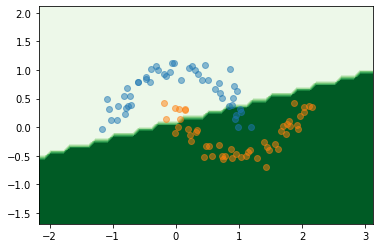

[[ 1.          0.95437187 -0.46553674]] pred as [[0.5182517  0.50331791]], should be [[0. 1.]]


In [57]:
# main function which will read the data from the blobs.csv and call the other functions for using an artificial neural network.
if __name__ == "__main__":

    data = pd.read_csv('moons.csv')
    X = data.iloc[:,:-1].to_numpy().T # all but last column of labels
    the_ones = np.ones((X.shape[1],1)).T # (1xm) additional row of 1's
    X = np.row_stack((the_ones, X)) # adding the row of 1's
    y = data.iloc[:,-1].to_numpy() # the last col is class
    Y = y.reshape(y.shape[0],-1).T # this is to get (1,m) rather than an (m,) array (2d instead of 1d)
    
    lr = LogisticRegressor(alpha=0.001, epochs=100000)
    lr.fit(X,Y) 
    
    plot_decision_boundary(X.T, y.T, lr)
    plt.show()

    y = y.reshape(-1,1)  # to get an mx1 array and not (m,)
    unique_classes = len(np.unique(y))
    y = get_one_hot(y, unique_classes)
    
    hidden = [2,5]
    theta = initialize_weights(X, unique_classes, hidden)
    activations = initialize_activations(X,unique_classes,hidden)

    m = X.shape[1]
    epochs = 2000
    for e in range(epochs):
        # print('Epoch {} '.format(e))
        for i in range(m):
            X_i = X[:,i]
            X_i = X_i.reshape(-1,1)
            y_i = y[i, :].T
            forward(X_i, hidden, activations, theta)
            backprop(y_i, hidden, activations, theta, alpha=0.5, reg=0)
    
    to_pred = X[:,0]
    y_i = y[0, :].T
    to_pred = to_pred.reshape(-1,1)
    y_pred = predict(to_pred, theta)
    print('{} pred as {}, should be {}'.format(to_pred.T, y_pred.T, y_i.T))